# Case 
For å løse denne casen ble jupyter notebook brukt i og med at det lett å blande code med text for å fortelle hvordan man løste case


## Bakgrunnen
Det er avgjørende for Hafslund Eco å vite hvor mye snø som ligger i fjellet, og egenskapene til denne snøen.

Snø -> Vann -> Strøm

## Oppgave
Implementer en "snøsimulator" med en grovt forenklet modell for snø \
Gjør gjerne ytliggere forenklinger der det er relevant

#### Input 
Metrologisk data fra Geilo \
Temperature,  Nedbør, tidpunkt


#### Output
Mengden snø \
Mengden og tidspunktet når vann renner ut i systemet

## 1. Få en feeling på input
  - Format 

In [2]:
with open("weather_geilo.csv", "r") as weather:
    print(weather.readline())
    print(weather.readline())
    print(weather.readline())

number_of_lines = 0
with open("weather_geilo.csv", "r") as weather:
    for line in weather:
        number_of_lines += 1

print(f"number of lines {number_of_lines}")

print(f"days {number_of_lines/24}")



time;precipitation;air_temperature

2022-10-01 01:00:00;0.1;4.7

2022-10-01 02:00:00;0.0;3.2

number of lines 5113
days 213.04166666666666


- semicolon separert ;
- første linje sier hva som er hva
- 2022-10-01 01:00:00 er tidsformat

### Plot data
- precipitation og air_temperature som en funksjon av tid


In [3]:
nedbor = []
temp = []
time = []
with open("weather_geilo.csv", "r") as weather:
    weather.readline()
    for line in weather:
        data = line.split(";")
        time.append(data[0])
        nedbor.append(float(data[1]))
        temp.append(float(data[2]))

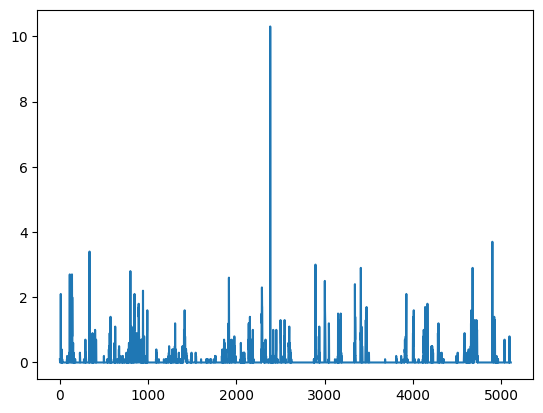

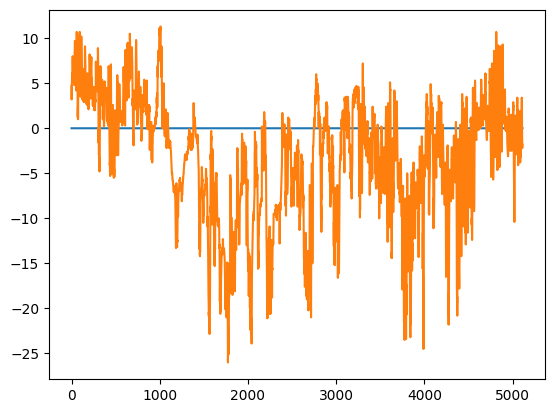

In [4]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(nedbor)
fig, ax = plt.subplots()
ax.plot([0]*len(time))
ax.plot(temp)
plt.show()

In [5]:
print("total nedbor", sum(nedbor))

total nedbor 473.5000000000009


#### Rules
##### Nedbør
- Snø: temp < 0
- Water: temp > 0

#### Snø
- Smelter: temp > 0, rate = temp * K_s
- Vann: snø * 0.6

#### Is
- Is: humidety * snow * konstant. temp > 0
- Vann: is * K_i temp > 0 

## 2 Nedbor

Temp > 0 = Sno
Temp < 0 = Regn



In [6]:
nedbør_som_sno = []
nedbør_som_regn = []
for idx, t in enumerate(time):
    if temp[idx] < 0 and nedbor[idx] > 0:
        nedbør_som_sno.append(nedbor[idx])
        nedbør_som_regn.append(0)
    else:
        nedbør_som_sno.append(0)
        nedbør_som_regn.append(nedbor[idx])
        
print(f"nedbør som snø {sum(nedbør_som_sno)}")
print(f"nedbør som regn {sum(nedbør_som_regn)}")
print(f"total nedbør {sum(nedbør_som_regn) + sum(nedbør_som_sno)}")

nedbør som snø 298.70000000000044
nedbør som regn 174.7999999999997
total nedbør 473.5000000000001


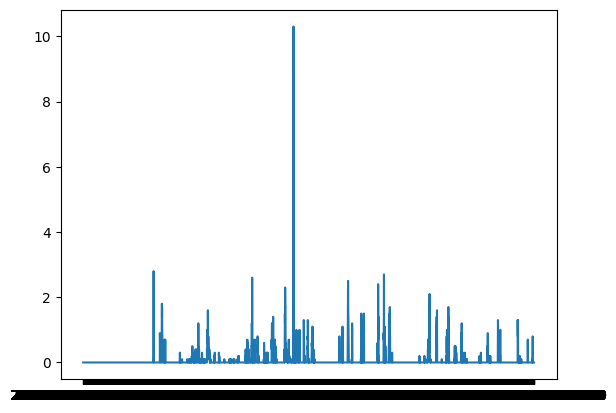

In [7]:
plt.plot(time, nedbør_som_sno)

Sno akumuleres

- snø dybde som en funksjon av tid

In [8]:
accumulert_sno = []
sno_akkumulert = 0
for sno in nedbør_som_sno:
    sno_akkumulert += sno
    accumulert_sno.append(sno_akkumulert)


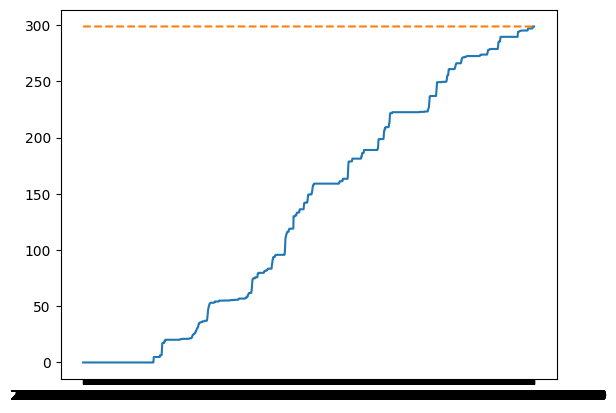

In [9]:
plt.plot(time, accumulert_sno)
plt.plot(time, [298.70000000000044]*len(time), "--")
plt.show()

## Sno
- Smelter: temp > 0, rate = temp * K_s
- Vann: snø * 0.6

smelte_rate[t] = K_s * temp[t] if temp[t] > 0

smeltet[t] = smelte_rate[t] * accumulert[t]


fuktighet[t+1] = rate[t] * mengden_sno[t]

if fuktighet[t] > menden_sno[t] * 0.6 
    vann = fuktighet[t]
    sno = menden_sno[t] - fuktighet[t]

### Letter på en lite subset 

In [4]:
temp = [-1, -2, 5, 0, 6]
nedbor = [1, 1, 0.3, 0.5, 0]

fig, ax = plt.subplots()
ax.plot(nedbor)
fig, ax = plt.subplots()
ax.plot(temp)
plt.show()

NameError: name 'plt' is not defined

### Regne ut en fasit 
temp = [-1, -2, 5, 0, 6] \
nedbor = [1, 1, 0.3, 0.5, 0]

Akkuumulert snø uten smelting \
[1, 2, 2, 2, 2] 

#### Snøsmelte rate 
snøsmelete_rate[t] = K_s * temp[t], if temp[t] > 0

smeltet_sno[t] = snøsmelte_rate[t] * mengden_sno[t] + smeltet_sno[t-1]
mengden_sno[t] = mengden_sno[t-1] - smeltet_sno[t]

if smeltet_sno[t] > mengde_smeltet[t] * 0.6 
    vann_i_systemet[t] = smelte_sno[t]
    smeltet_sno[t+1] = 0
else:
    vann_i_systemet[t] = 0

### Setter inn tall

K_s = 0.1

temp = [-1, -2, 5, 0, 6] \
nedbor = [1, 1, 0.3, 0.5, 0] \
akkumulert_snø = [1, 2, 2, 2, 2] \

t = 3

rate[3] = K_s * 5 = 5K_s \
mengde_smeltet[3] = 5K_s * 2 = 10K_s
mengden_sno[3] = 2 - 10K_s
K_s = 0.1
1 > 1 * 0.6 


accumulert_snø = 2 - 1 = 1

t = 5

rate[5] = 6K_s = 0.6
mengde_smeltet[5] = 1 + 0.6 * 1 = 1.6
sno = 2 - 1.6 = 0.4

if 1.6 > 0.4:
   vann = 1.6
   vann_i_snøen = 0





accumulert_snø = [1, 2, 1, 1, 0.4] \
vann_i_snøen= [0, 0, 1, 1, 0] \
vann_i_systemet = [0, 0, 0, 0, 1.6] 






In [13]:
K_s = 0.1

temp = [-1, -2, 5, 0, 6]
nedbor = [1, 1, 0.3, 0.5, 0]


In [10]:
akkumulert_sno = []
vann_i_snøen = []
vann_i_systemet = []

In [26]:
akkumulert_sno = []
vann_i_snøen = 0
vann_i_systemet = []


for idx, t in enumerate(temp):
    if t < 0 and nedbor[idx] > 0:
        akkumulert_sno.append(nedbor[idx] + akkumulert_sno[idx-1] if idx > 0 else nedbor[idx])
        vann_i_systemet.append(0)
    elif t > 0 and akkumulert_sno[idx-1] > 0:
        snøsmelte_rate = K_s * t
        vann_i_snøen = snøsmelte_rate * akkumulert_sno[idx-1] + vann_i_snøen
        akkumulert_sno.append(akkumulert_sno[idx-1] - vann_i_snøen)
        if vann_i_snøen > akkumulert_sno[idx] * 0.6:
            vann_i_systemet.append(vann_i_snøen)
            vann_i_snøen = 0
        else:
            vann_i_systemet.append(0)
    else:
        akkumulert_sno.append(akkumulert_sno[idx-1])
        vann_i_systemet.append(0)

print(akkumulert_sno)
print(vann_i_systemet)
    
    


[1, 2, 1.0, 1.0, 0.3999999999999999]
[0, 0, 1.0, 0, 0.6000000000000001]


#### Is
- Is: humidety * snow * konstant. temp > 0
- Vann: is * K_i temp > 0 


K_s = 0.1
K_is = 0.08

temp = [-1, -2, 3, -1, 6]
nedbor = [1, 1, 0.3, 0.5, 0]

accumulert_snø = [1, 2, ] \

t = 3
smelte_rate[3] = 0.1 * 3 = 0.3
mengden_smeltet[3] = 0.3 * 2 = 0.6
mengden_sno[3] = 2-0.6 = 1.4 

if 0.6 > 1.4 * 0.6  = 0.6 > 0.84

t = 4
is = 0.6

t = 5 
vann_i_systemet = 6 * 0.08 = 0.48
menden_smeltet_sno = 0.1 * 6 * 1.4 = 0.84
snø = 1.4 - 0.84

if 0.84 > 1.4 * 0.6:






In [34]:
K_s = 0.1

temp = [-1, -2, 3, 0, 6]
nedbor = [1, 1, 0.3, 0.5, 0]


akkumulert_sno = []
vann_i_snøen = 0
is_i_snøen = 0
vann_i_systemet = []


for idx, t in enumerate(temp):
    if t < 0:
        if nedbor[idx] > 0:
            akkumulert_sno.append(nedbor[idx] + akkumulert_sno[idx-1] if idx > 0 else nedbor[idx])
        if vann_i_snøen > 0:
            is_i_snøen += vann_i_snøen
            vann_i_snøen = 0
        vann_i_systemet.append(0)
    else:
        if akkumulert_sno[idx-1] > 0:
            snøsmelte_rate = K_s * t
            vann_i_snøen = snøsmelte_rate * akkumulert_sno[idx-1] + vann_i_snøen
            akkumulert_sno.append(akkumulert_sno[idx-1] - vann_i_snøen)
            if vann_i_snøen > akkumulert_sno[idx] * 0.6:
                vann_i_systemet.append(vann_i_snøen)
                vann_i_snøen = 0
        if is_i_snøen > 0:
            issmelte_rate = 0.08 * t
            is_smeltet = issmelte_rate * is_i_snøen
            is_i_snøen = is_i_snøen - is_smeltet
            vann_i_systemet.append(is_smeltet)
    
    
    
    
print(akkumulert_sno)
print(vann_i_systemet)


[1, 2, 1.4, 0.7999999999999998, 0.31999999999999984]
[0, 0, 0.6000000000000001, 0.48]


## Del 2 Modelering av snølag

- Snø legger seg lagvis 
- I steden for at snø renner ut av systemet renner den nå inn i laget under, når vannet rennet ut av nederste snølaget går den ned i bakken og forsvinner ut av systemet
- Kun det øverste laget som fryset til Is

## To muligheter
Ekspandere den løsningen over eller prøve noe annet

OOP (object orient programing)

- Vil is at binder data sammen med fuksjonene som operere på datane


I vårt tilfelle har vi \
Snø, Is og Snølag



### Sno
Attributter \
- K_s
- Snødybde (dybde)
- Fuktighet

Metoder \
- Smelting
- snøfall
- absorbere funktighet
- getter 


In [4]:

class Sno:
    def __init__(self, K_s: float) -> None:
        self.K_s = K_s
        self._dybde = 0
        self._fuktighet = 0

    def _snøsmelte_rate(self, temp):
        rate = self.K_s * temp
        if rate > 1:
            return 1
        return rate

    def absorbering(self, vann: float):
        """Absorberer vann i snøen"""

        self._fuktighet = self._fuktighet + vann

    def smelting(self, temp) -> float:
        """Smelter snøen og returnerer smeltet vann
        gitt at funktighet er større enn 60% av dybde"""
        smeltet_vann = 0
        self._fuktighet = self._snøsmelte_rate(temp) * self._dybde
        self._dybde = self._dybde - self._fuktighet
        if self._fuktighet > self._dybde * 0.6:
            smeltet_vann = self._fuktighet
            self._fuktighet = 0
        return smeltet_vann

    def snøfall(self, nedbør: float):
        """Økning av snydybde ved snøfall"""
        self._dybde = self._dybde + nedbør

    @property
    def dybde(self):
        return self._dybde

    @property
    def fuktighet(self):
        return self._fuktighet


### Is
Attributter 
- K_i
- Isdybde (dybde)

Metoder 
- Smelting
- dannelse
- getter

In [3]:
class Is:
    def __init__(self, K_i: float, dybde: float = 0) -> None:
        self.K_i = K_i
        self._dybde = dybde

    def _is_smelte_rate(self, temp):
        rate = self.K_i * temp
        if rate > 1:
            return 1
        return rate

    def smelting(self, temp) -> float:
        """Smelting av is og returnerer smeltet vann"""
        vann = self._is_smelte_rate(temp) * self._dybde
        self._dybde = self._dybde - vann
        return vann

    def dannelse(self, smeltevann):
        """Dannelse av is ved at smeltetvann fryser til is"""
        self._dybde = self._dybde + smeltevann

    @property
    def dybde(self):
        return self._dybde


### Snølag
- Is og snø danner snølag 
- Når vannet i den øverste snø laget har fryst (nytt lag med is over snø). Kommer det ny snø (nytt lag med snø)
Antagler

- smelting skjer i topp laget, det er det som er eksponert mot



SnøLag
Attributter 
- K_i
- K_s
- Lag

- Lag er en stack(liste) med de forskjellige lagene, \
Før simuleiringen starter er det ingen snø i terrenget

-Absorbering av snø modelere litt forskjellig 

Metoder 
- dybde (dybden til hele snølaget)
- smelting
- dannelse
- getter


In [ ]:
class SnøLag:
    def __init__(self, K_s: float, K_i: float) -> None:
        self.K_s = K_s
        self.K_i = K_i
        self.lag: list[Is | Sno] = []
    
    @property
    def ingen_sno(self):
        return self.antall_snø_lag() == 0

    @property
    def øverste_lag(self):
        return self.lag[-1]
    
    @property
    def antall_snø_lag(self):
        return len(self.lag)

    @property
    def dybde(self):
        return sum([lag.dybde for lag in self.lag])
    
    def fjerne_øverste_lag_dersom_smeltet(self):
        if self.øverste_lag.dybde == 0:
            self.lag.pop()

    def absorbering_av_vann_fra_øvrige_lag(self, vann_i_snøen) -> float:
        """Absorberer av vann i underliggende snø, dersom det er et lag med snø
        så går vannet ut i systemet """
        if self.antall_snø_lag == 1:
            return vann_i_snøen
        else:
            self.lag[-2].absorbering(vann_i_snøen)
            return 0
            
    
    def smelting(self, temp) -> float:
        if self.ingen_sno():
            return 0
        vann_i_snøen = self.øverste_lag.smelting(temp)
        self.fjerne_øverste_lag_dersom_smeltet()
        vann_i_systemet = self.absorbering_av_vann_fra_øvrige_lag(vann_i_snøen)

        return vann_i_systemet

    def snøfall(self, snofall: float):
        if self.ingen_sno() or isinstance(self.øverste_lag, Is):
            self.lag.append(Sno(self.K_s))
        self.øverste_lag.snøfall(snofall)

    def minus(self):
        if self.ingen_sno:
            return
        if self.øverste_lag.fuktighet > 0:
            self.lag.append(Is(self.K_i, self.øverste_lag.fuktighet))